In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
df = pd.read_csv('1997-01-10-2025-02-07-Southeast_Asia-Cambodia.csv')

In [3]:
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_best
0,KHM2471,22 January 2025,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Cambodia),Labor Group (Cambodia),Protesters,...,11.5883,104.9265,1,Camboja News; LICADHO,National,"On 22 January 2025, members of the Free Trade ...",0,crowd size=no report,1738102167,25041.0
1,KHM2468,21 January 2025,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Cambodia),Farmers (Cambodia),Protesters,...,11.2729,104.8222,1,Radio Free Asia,Regional,"On 21 January 2025, hundreds of farmers in Bat...",0,crowd size=hundreds,1738102167,3608.0
2,KHM2470,20 January 2025,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Cambodia),Labor Group (Cambodia),Protesters,...,11.6537,104.8618,1,LICADHO; Radio Free Asia,National-Regional,"On 20 January 2025, about 300 workers staged a...",0,crowd size=about 300,1738102167,6421.0
3,KHM2469,18 January 2025,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Cambodia),Labor Group (Cambodia),Protesters,...,11.5065,104.7159,1,Radio Free Asia,Regional,"On 18 January 2025, hundreds of workers staged...",0,crowd size=hundreds,1738102167,1219.0
4,KHM2467,13 January 2025,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Cambodia),Farmers (Cambodia); Women (Cambodia),Protesters,...,12.7745,103.4492,1,Radio Free Asia,Regional,"On 13 January 2025, about 60 farmers, mostly w...",0,crowd size=about 60,1737495249,3615.0


In [24]:
print(df["notes"])

0       On 22 January 2025, members of the Free Trade ...
1       On 21 January 2025, hundreds of farmers in Bat...
2       On 20 January 2025, about 300 workers staged a...
3       On 18 January 2025, hundreds of workers staged...
4       On 13 January 2025, about 60 farmers, mostly w...
                              ...                        
2427    On 9 January 2010, workers at a shoe factory i...
2428    On 8 January 2010, 900 workers at a factory in...
2429    On 5 January 2010, residents of Boeung Kak pro...
2430    On 3 January 2010, approximately 100 villagers...
2431    On 3 January 2010, a Cambodian man was shot by...
Name: notes, Length: 2432, dtype: object


In [6]:
print(df["sub_event_type"].unique())

['Peaceful protest' 'Violent demonstration'
 'Excessive force against protesters' 'Protest with intervention' 'Other'
 'Attack' 'Remote explosive/landmine/IED' 'Arrests'
 'Change to group/activity' 'Mob violence' 'Looting/property destruction'
 'Armed clash' 'Abduction/forced disappearance' 'Disrupted weapons use'
 'Sexual violence' 'Grenade']


In [7]:
associated_actor = df["assoc_actor_1"].value_counts()
print(associated_actor)

assoc_actor_1
Labor Group (Cambodia)                                                                                                                    860
Farmers (Cambodia)                                                                                                                         90
Boeung Kak Communal Group (Cambodia); Women (Cambodia)                                                                                     77
CNRP: Cambodia National Rescue Party                                                                                                       54
Buddhist Group (Cambodia)                                                                                                                  34
                                                                                                                                         ... 
Private Security Forces (Cambodia); Vigilante Group (Cambodia)                                                                        

/tmp/ipykernel_179/3690935227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_actors.index, y=top_10_actors.values, palette="viridis", legend=False)


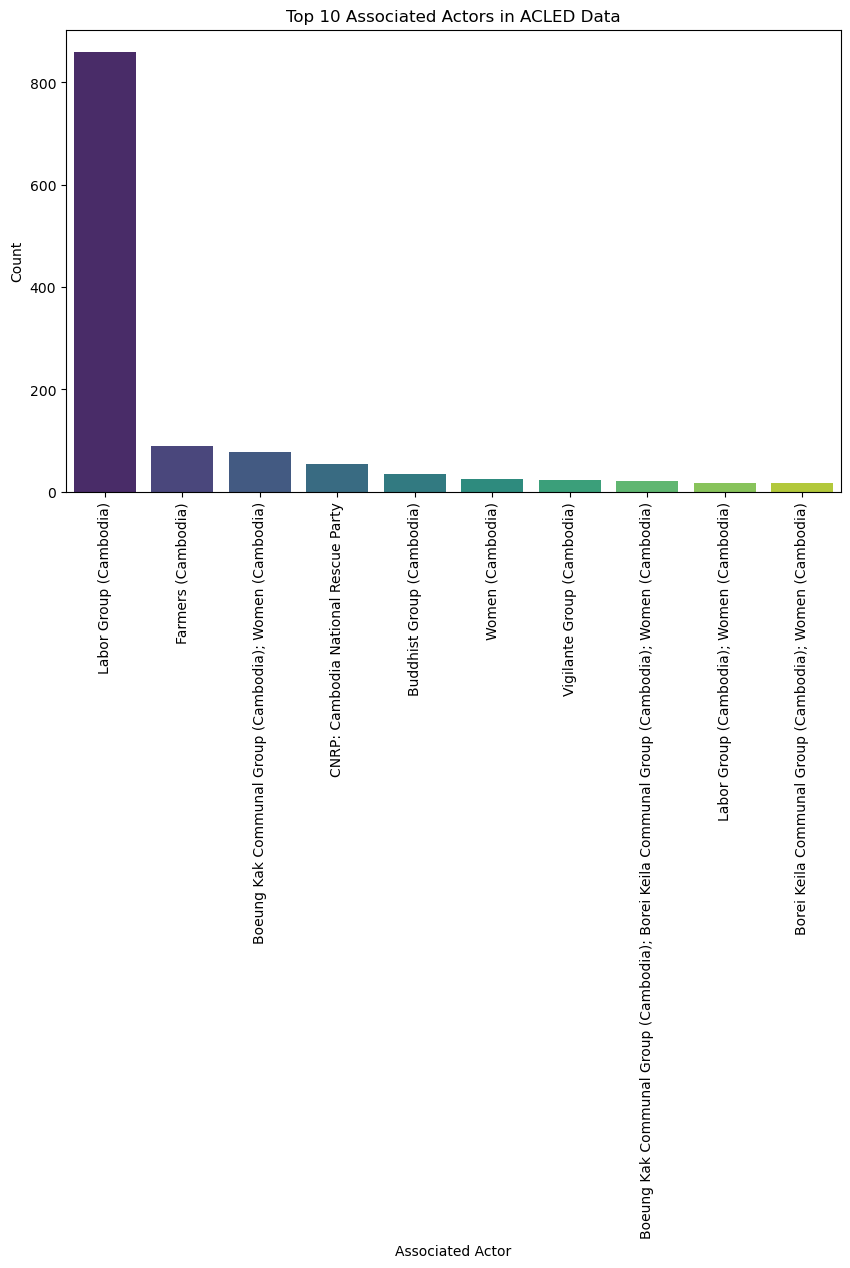

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_actors = associated_actor.sort_values(ascending=False).head(10)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_actors.index, y=top_10_actors.values, palette="viridis", legend=False)

# Labels and title
plt.xlabel("Associated Actor")
plt.ylabel("Count")
plt.title("Top 10 Associated Actors in ACLED Data")

# Show plot
plt.xticks(rotation=90)
plt.show()


In [4]:
primary_actor = df["actor1"].value_counts()
print(primary_actor)

actor1
Protesters (Cambodia)                                   1837
Unidentified Armed Group (Cambodia)                      199
Rioters (Cambodia)                                       189
Military Forces of Cambodia (1993-)                       72
Police Forces of Cambodia (1993-)                         67
Unidentified Communal Militia (Cambodia)                   9
Military Forces of Thailand (2008-2011)                    8
Private Security Forces (Cambodia)                         7
Police Forces of Cambodia (1993-) Prison Guards            7
Government of Cambodia (1993-)                             6
Police Forces of Cambodia (1993-) Forestry Officials       3
Private Security Forces (Vietnam)                          2
Protesters (Thailand)                                      1
Protesters (India)                                         1
Trapaing Phlaing Communal Militia (Cambodia)               1
LDP: League for Democracy Party                            1
Military Forces o

In [7]:
protest_counts = df["sub_event_type"].value_counts()
print(protest_counts)

sub_event_type
Peaceful protest                      1550
Protest with intervention              269
Other                                  157
Attack                                 123
Violent demonstration                  103
Mob violence                            84
Armed clash                             52
Excessive force against protesters      36
Looting/property destruction            12
Arrests                                 11
Change to group/activity                11
Disrupted weapons use                   10
Grenade                                  7
Abduction/forced disappearance           5
Remote explosive/landmine/IED            1
Sexual violence                          1
Name: count, dtype: int64


In [8]:
protest_counts_df = protest_counts.reset_index()
protest_counts_df.columns = ["Protest Type", "Count"]
print(protest_counts_df)

                          Protest Type  Count
0                     Peaceful protest   1550
1            Protest with intervention    269
2                                Other    157
3                               Attack    123
4                Violent demonstration    103
5                         Mob violence     84
6                          Armed clash     52
7   Excessive force against protesters     36
8         Looting/property destruction     12
9                              Arrests     11
10            Change to group/activity     11
11               Disrupted weapons use     10
12                             Grenade      7
13      Abduction/forced disappearance      5
14       Remote explosive/landmine/IED      1
15                     Sexual violence      1


/tmp/ipykernel_226/3314217223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=protest_counts.values, y=protest_counts.index, palette="viridis")


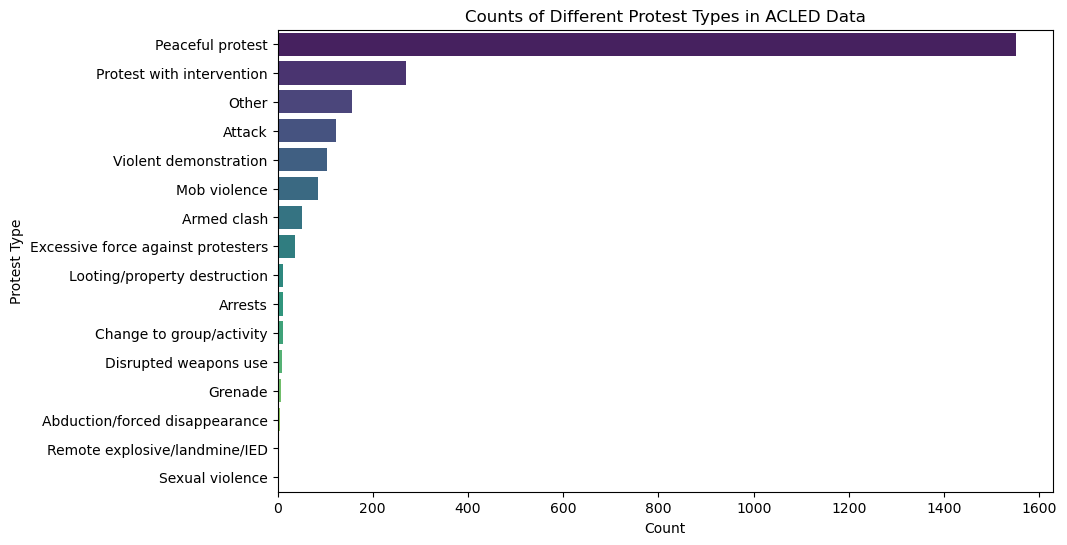

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=protest_counts.values, y=protest_counts.index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Protest Type")
plt.title("Counts of Different Protest Types in ACLED Data")
plt.show()


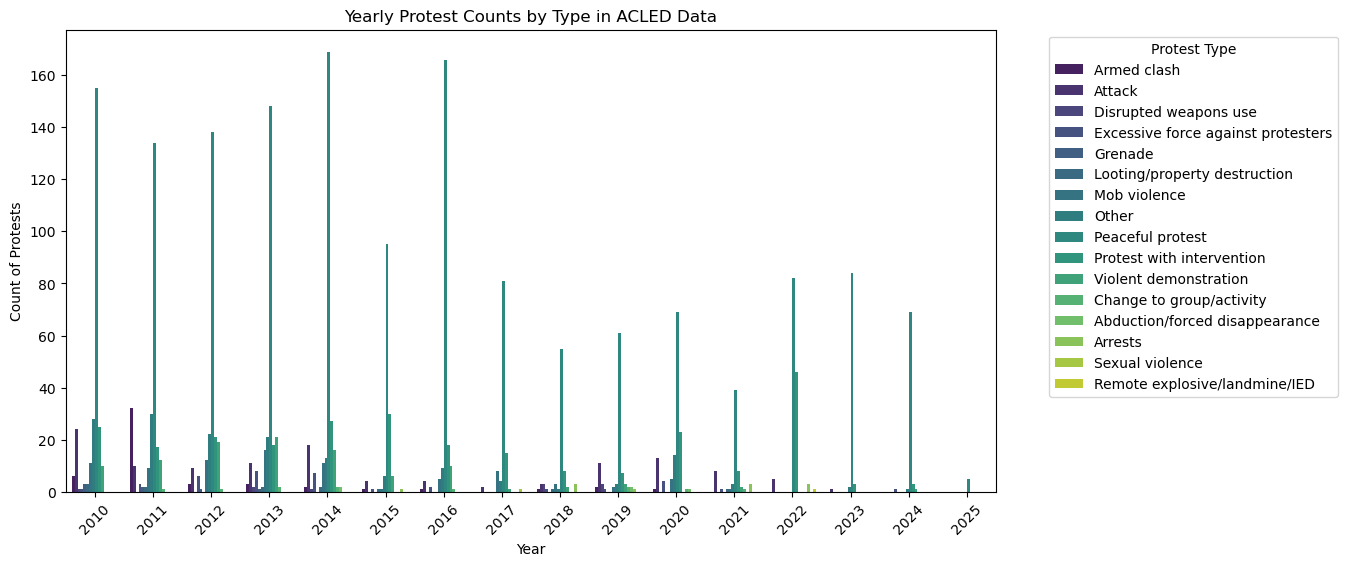

In [18]:
# Ensure 'event_date' is in datetime format
df["event_date"] = pd.to_datetime(df["event_date"])

# Extract the year
df["year"] = df["event_date"].dt.year

# Group by year and protest type, then count occurrences
protest_counts_by_year = df.groupby(["year", "sub_event_type"]).size().reset_index(name="count")

# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=protest_counts_by_year, x="year", y="count", hue="sub_event_type", palette="viridis")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Count of Protests")
plt.title("Yearly Protest Counts by Type in ACLED Data")
plt.legend(title="Protest Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_226/2988829729.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=protest_counts_2023, x="sub_event_type", y="count", palette="viridis")


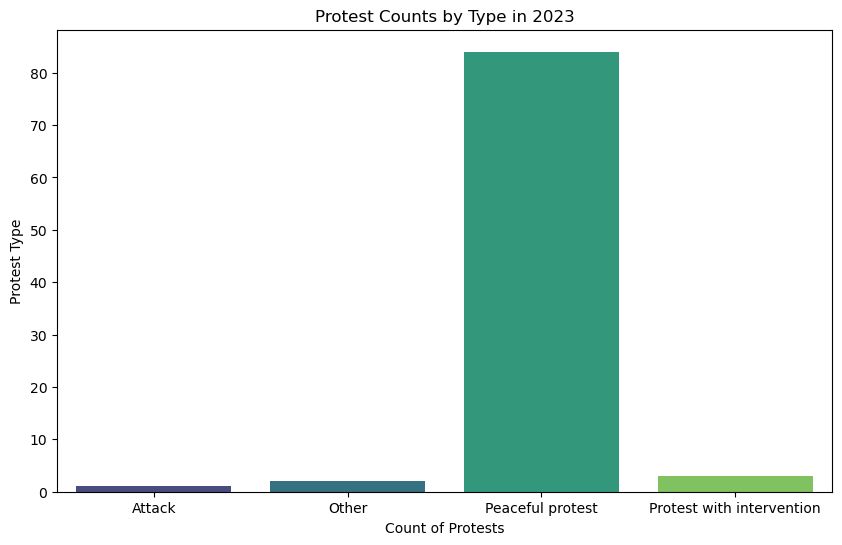

In [20]:
df_2023 = df[df["year"] == 2023]

# Group by protest type and count occurrences
protest_counts_2023 = df_2023.groupby("sub_event_type").size().reset_index(name="count")

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=protest_counts_2023, x="sub_event_type", y="count", palette="viridis")

# Labels and title
plt.xlabel("Count of Protests")
plt.ylabel("Protest Type")
plt.title("Protest Counts by Type in 2023")

# Show plot
plt.show()

### Mapping

In [11]:
import folium

# Define base map centered on Cambodia
m = folium.Map(location=[12.5657, 104.9910], zoom_start=6)

# Add protest locations
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        popup=row["sub_event_type"],  # Shows protest type on click
        color="red" if "Violent protest" in row["sub_event_type"] else "blue",
        fill=True,
    ).add_to(m)

# Save or display map
m.save("cambodia_protests.html")
m

In [12]:
protest_counts = {}

for event in df["sub_event_type"]:
    protest_counts[event] = protest_counts.get(event, 0) + 1

print(protest_counts)


{'Peaceful protest': 1550, 'Violent demonstration': 103, 'Excessive force against protesters': 36, 'Protest with intervention': 269, 'Other': 157, 'Attack': 123, 'Remote explosive/landmine/IED': 1, 'Arrests': 11, 'Change to group/activity': 11, 'Mob violence': 84, 'Looting/property destruction': 12, 'Armed clash': 52, 'Abduction/forced disappearance': 5, 'Disrupted weapons use': 10, 'Sexual violence': 1, 'Grenade': 7}


In [15]:
import pandas as pd
import folium
import os
from folium.plugins import HeatMap
import re  # Import regex for filename sanitization

# Ensure output directory exists
output_dir = "protest_heatmaps"
os.makedirs(output_dir, exist_ok=True)

# Get unique protest types
protest_types = df["sub_event_type"].unique()

# Loop through each protest type and create a heatmap
for protest in protest_types:
    # Filter data for this specific protest type
    df_filtered = df[df["sub_event_type"] == protest]

    # Initialize the map centered around Cambodia
    m = folium.Map(location=[12.5657, 104.9910], zoom_start=6)

    # Check if there are enough data points to plot a heatmap
    if not df_filtered.empty:
        # Extract latitude and longitude for heatmap
        heat_data = df_filtered[["latitude", "longitude"]].dropna().values.tolist()

        # Add heatmap layer
        HeatMap(heat_data, radius=10, blur=15, max_zoom=10).add_to(m)

    # Sanitize the filename to remove special characters
    safe_protest_name = re.sub(r'[^\w\s-]', '_', protest).replace(" ", "_")

    # Save the heatmap as an HTML file
    map_filename = f"{output_dir}/{safe_protest_name}_heatmap.html"
    m.save(map_filename)
    print(f"Saved: {map_filename}")

print("All heatmaps created successfully!")


Saved: protest_heatmaps/Peaceful_protest_heatmap.html
Saved: protest_heatmaps/Violent_demonstration_heatmap.html
Saved: protest_heatmaps/Excessive_force_against_protesters_heatmap.html
Saved: protest_heatmaps/Protest_with_intervention_heatmap.html
Saved: protest_heatmaps/Other_heatmap.html
Saved: protest_heatmaps/Attack_heatmap.html
Saved: protest_heatmaps/Remote_explosive_landmine_IED_heatmap.html
Saved: protest_heatmaps/Arrests_heatmap.html
Saved: protest_heatmaps/Change_to_group_activity_heatmap.html
Saved: protest_heatmaps/Mob_violence_heatmap.html
Saved: protest_heatmaps/Looting_property_destruction_heatmap.html
Saved: protest_heatmaps/Armed_clash_heatmap.html
Saved: protest_heatmaps/Abduction_forced_disappearance_heatmap.html
Saved: protest_heatmaps/Disrupted_weapons_use_heatmap.html
Saved: protest_heatmaps/Sexual_violence_heatmap.html
Saved: protest_heatmaps/Grenade_heatmap.html
All heatmaps created successfully!


In [17]:
import pandas as pd
import folium
import os
from folium.plugins import HeatMap
import re  # Import regex for filename sanitization

# Load the ACLED dataset


# Initialize the map centered around Cambodia
m = folium.Map(location=[12.5657, 104.9910], zoom_start=6)

# Get unique protest types
protest_types = df["sub_event_type"].unique()

# Loop through each protest type and create a heatmap layer
for protest in protest_types:
    # Filter data for this specific protest type
    df_filtered = df[df["sub_event_type"] == protest]

    # Check if there are enough data points to plot a heatmap
    if not df_filtered.empty:
        # Extract latitude and longitude for heatmap
        heat_data = df_filtered[["latitude", "longitude"]].dropna().values.tolist()

        # Sanitize layer name to remove special characters
        safe_protest_name = re.sub(r'[^\w\s-]', '_', protest).replace(" ", "_")

        # Create a FeatureGroup for each protest type (makes it toggleable)
        heat_layer = folium.FeatureGroup(name=protest)

        # Add heatmap layer
        HeatMap(heat_data, radius=10, blur=15, max_zoom=10).add_to(heat_layer)

        # Add the FeatureGroup to the main map
        heat_layer.add_to(m)

# Add LayerControl to allow toggling of different protest heatmaps
folium.LayerControl().add_to(m)

# Save the interactive map
map_filename = "interactive_protest_heatmap.html"
m.save(map_filename)
print(f"Interactive map saved as: {map_filename}")


Interactive map saved as: interactive_protest_heatmap.html
